# Variable Engineering

## Load Liberies

In [74]:
import numpy as np #
import pandas as pd #
from subprocess import check_output #
import matplotlib.pyplot as plt #
import seaborn as sns #

In [75]:
airRes = pd.read_csv('./input/air_reserve.csv')
airStore = pd.read_csv('./input/air_store_info.csv')
airVisit = pd.read_csv('./input/air_visit_data.csv')

relID = pd.read_csv('./input/store_id_relation.csv')

hpgRes = pd.read_csv('./input/hpg_reserve.csv')
hpgStore = pd.read_csv('./input/hpg_store_info.csv')

dates = pd.read_csv('./input/date_info.csv')

### Help function 

In [76]:
STARS ='\n***********************************************************\n'
def printData(tableFunc) :
    print("The Shape of the Table is: ",tableFunc.shape)
    print(STARS)
    print('The name of the columns are: {}'.format(tableFunc.columns))
    


def displayData(tableFunc, lines = 3):
    display(tableFunc.head(lines))
    display(tableFunc.describe())
    display('the types of this table is',tableFunc.dtypes)

### AIR

In [112]:
airVisit['visitors' == 877]

KeyError: False

In [77]:
displayData(airRes)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6


,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


'the types of this table is'

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [78]:
displayData(airStore)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


'the types of this table is'

air_store_id       object
air_genre_name     object
air_area_name      object
latitude          float64
longitude         float64
dtype: object

### HPG

In [79]:
displayData(hpgRes)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2


,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


'the types of this table is'

hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [80]:
printData(hpgRes)

The Shape of the Table is:  (2000320, 4)

***********************************************************

The name of the columns are: Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')


In [81]:
displayData(hpgStore)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


'the types of this table is'

hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object

### Store ID relation

In [82]:
displayData(relID)

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9


,air_store_id,hpg_store_id
count,150,150
unique,150,150
top,air_63b13c56b7201bd9,hpg_ac318be70910278f
freq,1,1


'the types of this table is'

air_store_id    object
hpg_store_id    object
dtype: object

### 1.1 Merge <code>air_reserve</code> and  <code> air_store_info </code>

In [83]:
air = pd.merge(airRes,airStore,on='air_store_id')

In [84]:
displayData(air)
printData(air)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


,reserve_visitors,latitude,longitude
count,92378.000000,92378.000000,92378.000000
mean,4.481749,36.296511,137.258264
std,4.919669,2.994006,3.802518
min,1.000000,33.211967,130.348436
25%,2.000000,34.681261,134.841177
50%,3.000000,35.641463,139.036327
75%,5.000000,35.694003,139.770825
max,100.000000,44.020632,144.273398


'the types of this table is'

air_store_id         object
visit_datetime       object
reserve_datetime     object
reserve_visitors      int64
air_genre_name       object
air_area_name        object
latitude            float64
longitude           float64
dtype: object

The Shape of the Table is:  (92378, 8)

***********************************************************

The name of the columns are: Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude'],
      dtype='object')


### 1.2 Merge <code>hpg_reserve</code> and  <code>hpg_store_info </code>

In [85]:
hpg = pd.merge(hpgRes,hpgStore,on='hpg_store_id')

In [86]:
displayData(hpg)
printData(hpg)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698


,reserve_visitors,latitude,longitude
count,871308.000000,871308.000000,871308.000000
mean,5.335364,35.859339,137.492275
std,5.890690,2.266437,3.302581
min,1.000000,33.311645,130.339313
25%,2.000000,34.692109,135.495215
50%,3.000000,35.648231,139.373870
75%,6.000000,35.704527,139.737998
max,100.000000,43.774846,143.714585


'the types of this table is'

hpg_store_id         object
visit_datetime       object
reserve_datetime     object
reserve_visitors      int64
hpg_genre_name       object
hpg_area_name        object
latitude            float64
longitude           float64
dtype: object

The Shape of the Table is:  (871308, 8)

***********************************************************

The name of the columns are: Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'hpg_genre_name', 'hpg_area_name', 'latitude',
       'longitude'],
      dtype='object')


### 2.1 Merge with new table <code>air</code> and <code>store_id_relation</code>

In [87]:
airRel = pd.merge(air,relID,how='left',on='air_store_id')

In [88]:
displayData(airRel)
printData(airRel)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


,reserve_visitors,latitude,longitude
count,92378.000000,92378.000000,92378.000000
mean,4.481749,36.296511,137.258264
std,4.919669,2.994006,3.802518
min,1.000000,33.211967,130.348436
25%,2.000000,34.681261,134.841177
50%,3.000000,35.641463,139.036327
75%,5.000000,35.694003,139.770825
max,100.000000,44.020632,144.273398


'the types of this table is'

air_store_id         object
visit_datetime       object
reserve_datetime     object
reserve_visitors      int64
air_genre_name       object
air_area_name        object
latitude            float64
longitude           float64
hpg_store_id         object
dtype: object

The Shape of the Table is:  (92378, 9)

***********************************************************

The name of the columns are: Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude', 'hpg_store_id'],
      dtype='object')


### 2.2 Merge with new table <code>hpg</code> and <code>store_id_relation</code>

In [89]:
hpgRel = pd.merge(hpg,relID,how='left',on='hpg_store_id')

In [90]:
displayData(hpgRel)
printData(hpgRel)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN


,reserve_visitors,latitude,longitude
count,871308.000000,871308.000000,871308.000000
mean,5.335364,35.859339,137.492275
std,5.890690,2.266437,3.302581
min,1.000000,33.311645,130.339313
25%,2.000000,34.692109,135.495215
50%,3.000000,35.648231,139.373870
75%,6.000000,35.704527,139.737998
max,100.000000,43.774846,143.714585


'the types of this table is'

hpg_store_id         object
visit_datetime       object
reserve_datetime     object
reserve_visitors      int64
hpg_genre_name       object
hpg_area_name        object
latitude            float64
longitude           float64
air_store_id         object
dtype: object

The Shape of the Table is:  (871308, 9)

***********************************************************

The name of the columns are: Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'hpg_genre_name', 'hpg_area_name', 'latitude',
       'longitude', 'air_store_id'],
      dtype='object')


### 3 Merge with new tables <code>airRel</code> and <code>hpgRel</code>

In [91]:
print("there are ",len(air)," restaurants with AIR and ",len(hpg)," with HPG.",len(relID),' have both.')

there are  92378  restaurants with AIR and  871308  with HPG. 150  have both.


In [92]:
full = pd.merge(airRel,hpgRel,how='outer')
displayData(full)
printData(full)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN


,reserve_visitors,latitude,longitude
count,963686.000000,963686.000000,963686.000000
mean,5.253537,35.901246,137.469843
std,5.810087,2.349505,3.354441
min,1.000000,33.211967,130.339313
25%,2.000000,34.692109,135.483426
50%,3.000000,35.646745,139.373870
75%,6.000000,35.704527,139.737998
max,100.000000,44.020632,144.273398


'the types of this table is'

air_store_id         object
visit_datetime       object
reserve_datetime     object
reserve_visitors      int64
air_genre_name       object
air_area_name        object
latitude            float64
longitude           float64
hpg_store_id         object
hpg_genre_name       object
hpg_area_name        object
dtype: object

The Shape of the Table is:  (963686, 11)

***********************************************************

The name of the columns are: Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude', 'hpg_store_id', 'hpg_genre_name', 'hpg_area_name'],
      dtype='object')


### 1.1 KNN Clustering by region in Japan

Apparently Japan's terittory is divided in 8 regions which are not official administrative units, but have been traditionally used as the regional division of Japan in a number of contexts [https://en.wikipedia.org/wiki/List_of_regions_of_Japan ]

From north to south, the traditional regions are:
* **Hokkaidō** (the island of Hokkaidō and nearby islands, population: 5,507,456, largest city: Sapporo)
* **Tōhoku** region (northern Honshū, population: 9,335,088, largest city: Sendai)
* **Kantō** region (eastern Honshū, population: 42,607,376, largest city: Tokyo)
* **Chūbu region** (central Honshū, including Mt. Fuji, population: 21,714,995, largest city: Nagoya), sometimes divided into:
   * Hokuriku region (northwestern Chūbu, largest city: Kanazawa)
   * Kōshin'etsu region (northeastern Chūbu, largest city: Niigata)
  * Tōkai region (southern Chūbu, largest city: Nagoya)
* **Kansai or Kinki** region (west-central Honshū, including the old capital, Kyoto, population: 22,755,030, largest city: Osaka)
* **Chūgoku** region (western Honshū, population: 7,561,899, largest city: Hiroshima)
* **Shikoku** (island, population: 3,977,205, largest city: Matsuyama)
* **Kyūshū** (island, population: 14,596,977, largest city: Fukuoka) which includes:
  * Northern Kyushu: Fukuoka, Saga, Nagasaki and Ōita (largest city: Fukuoka)
  * Southern Kyushu: Kumamoto, Miyazaki and Kagoshima (largest city: Kagoshima)
  * Okinawa (largest city: Naha)

In [93]:
from sklearn.cluster import KMeans

In [94]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(full[['longitude','latitude']])
full['cluster'] = kmeans.predict(full[['longitude','latitude']])

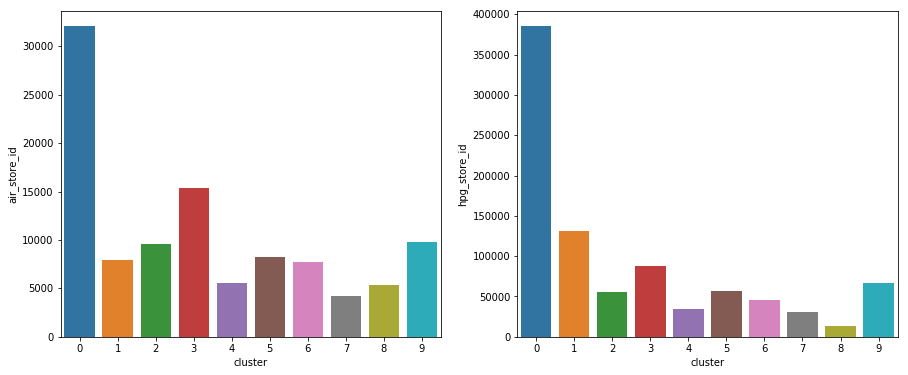

In [95]:
f,axa = plt.subplots(1,2,figsize=(15,6))
hist_clust = full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=hist_clust.cluster,y=hist_clust.air_store_id,ax=axa[0])
sns.barplot(x=hist_clust.cluster,y=hist_clust.hpg_store_id,ax=axa[1])
plt.show()

Let's try to relate the identified groups with the biggest cities:

* Cluster 0 refers to Tokyo.
* Cluster 1 refers  to Osaka
* Cluster 2 refers to Sapporo
* Cluster 3 refers to Fukuoka
* Cluster 4 refers to Niigata
* Cluster 5 referst to Hiroshima
* Cluster 6 refers to Shizouku
* Cluster 7 refers to Sendai
* Cluster 9 refers to Kobe

## 1.2. Data distributed

C:\Users\gali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


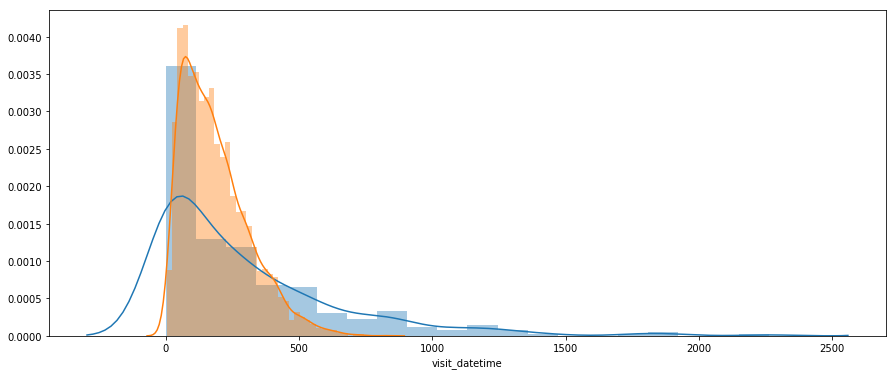

In [96]:
f,ax = plt.subplots(1,1,figsize=(15,6))
airhist = air.groupby(['air_store_id'],as_index=False).count()
sns.distplot(airhist.visit_datetime)
hpghist = hpg.groupby(['hpg_store_id'],as_index=False).count()
sns.distplot(hpghist.visit_datetime)
plt.show()

### Japanese Holidays

Let's check what are the Japanese holidays excluding Saturday and Sundays

I want to learn more about that so I will rely on this list https://www.officeholidays.com/countries/japan/index.php

* Jan 1st - **New Years day **;
* 2nd Monday of January - **Coming of Age day **: The day honors young Japanese who will reach the age of 20 at any point during the year. Twenty is the age of majority in Japan, and people who have reached this age gain the right to vote in elections as well as to drink;
* Feb 11th - **National Foundation day**:  a national holiday for Japanese people to remind themselves of the nation's founding and foster their love for the nation;
* March 20th or 21st- **Vernal Equinox day**: The day is intended to celebrate the love of nature and living things.In modern Japan, the day still maintains its older traditions as visiting family graves and holding family reunions is a common way of celebrating the equinox;
* April 29th - ** Showa day**: Showa Day honours the birthday of Emperor Hirohito, the reigning Emperor before, during, and after World War II (from 1926 - 1989);

continue...


In [97]:
displayData(dates,15)
#dates.head(15)

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
5,2016-01-06,Wednesday,0
6,2016-01-07,Thursday,0
7,2016-01-08,Friday,0
8,2016-01-09,Saturday,0
9,2016-01-10,Sunday,0


,holiday_flg
count,517.000000
mean,0.067698
std,0.251471
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


'the types of this table is'

calendar_date    object
day_of_week      object
holiday_flg       int64
dtype: object

In [109]:
full.head(3)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name,cluster,vd,vt,rd,rt
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,2016-01-01,19:00:00,2016-01-01,16:00:00
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,2016-01-01,20:00:00,2016-01-01,16:00:00
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,2016-01-02,18:00:00,2016-01-01,16:00:00


In [98]:
vdt = pd.to_datetime(full.visit_datetime)
rdt = pd.to_datetime(full.reserve_datetime)
full['vd']=vdt.dt.date
full['vt']=vdt.dt.time
full['rd']=rdt.dt.date
full['rt']=rdt.dt.time

dts = pd.to_datetime(dates.calendar_date)
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
dates['calendar_date'] = pd.to_datetime(dates['calendar_date']).dt.date
dates['dy'] = dts.dt.dayofyear
dates['dw'] = [days.index(dw) for dw in dates.day_of_week] # 
dates.tail(10)

,calendar_date,day_of_week,holiday_flg,dy,dw
507,2017-05-22,Monday,0,142,1
508,2017-05-23,Tuesday,0,143,2
509,2017-05-24,Wednesday,0,144,3
510,2017-05-25,Thursday,0,145,4
511,2017-05-26,Friday,0,146,5
512,2017-05-27,Saturday,0,147,6
513,2017-05-28,Sunday,0,148,0
514,2017-05-29,Monday,0,149,1
515,2017-05-30,Tuesday,0,150,2
516,2017-05-31,Wednesday,0,151,3


In [99]:
#dates['dy'].unique()
517 - 366

151

In [100]:
nf = pd.merge(full,dates[['calendar_date','holiday_flg']],how='left',left_on='vd',right_on='calendar_date')
nf = nf.rename(index = str, columns = {'holiday_flg':'visit_holiday'})
nf = nf.drop(['calendar_date'],axis=1)

nf = pd.merge(nf,dates[['calendar_date','holiday_flg']],how = 'left', left_on='rd',right_on='calendar_date')
nf = nf.rename(index = str, columns = {'holiday_flg':'reservation_holiday'})
nf = nf.drop(['calendar_date'],axis=1)

nf['vd'] = pd.to_datetime(nf['vd']).dt.dayofyear
nf['rd'] = pd.to_datetime(nf['rd']).dt.dayofyear
nf.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name,cluster,vd,vt,rd,rt,visit_holiday,reservation_holiday
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,1,19:00:00,1,16:00:00,1,1
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,1,20:00:00,1,16:00:00,1,1
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,2,18:00:00,1,16:00:00,1,1
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,2,21:00:00,1,16:00:00,1,1
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,0,8,21:00:00,4,20:00:00,0,0


We can check how many days before the visit japenese people make the reservation.

In [101]:
deltatime = vdt - rdt
days = deltatime.dt.days

days.describe()

count    963686.000000
mean          6.909061
std          11.507296
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         393.000000
dtype: float64

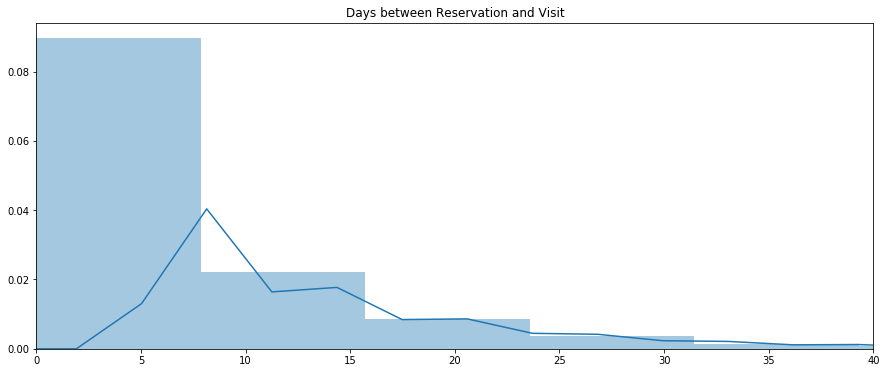

In [102]:
f,axa = plt.subplots(1,1,figsize=(15,6))
sns.distplot(days)
plt.xlim(0,40)
axa.set_title('Days between Reservation and Visit')
plt.show()

## Weather Data

In [103]:
wd = pd.read_csv('./input/WeatherData.csv')
displayData(wd,5)

,area_name,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature
0,fukuoka_dazaifu-kana_dasaif,1/1/16,0.0,5.7,NaN,NaN,5.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.1
1,fukuoka_dazaifu-kana_dasaif,1/2/16,0.5,10.2,NaN,NaN,1.3,2.2,NaN,NaN,NaN,NaN,NaN,NaN,15.3,6.1
2,fukuoka_dazaifu-kana_dasaif,1/3/16,0.0,11.2,NaN,NaN,0.5,0.9,NaN,NaN,NaN,NaN,NaN,NaN,15.5,7.1
3,fukuoka_dazaifu-kana_dasaif,1/4/16,0.0,9.4,NaN,NaN,4.2,1.8,NaN,NaN,NaN,NaN,NaN,NaN,16.1,5.9
4,fukuoka_dazaifu-kana_dasaif,1/5/16,1.5,8.8,NaN,NaN,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,12.3,7.1


,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,avg_sea_pressure,avg_local_pressure,solar_radiation,cloud_cover,high_temperature,low_temperature
count,29465.000000,28936.000000,4177.000000,4684.000000,25823.000000,28843.000000,9806.000000,9806.000000,9823.000000,9823.000000,6204.000000,7238.000000,28936.000000,28936.000000
mean,4.747175,13.285257,1.646158,16.965414,5.322329,2.632892,12.407944,69.448909,1014.771170,1010.085422,13.286663,7.091337,17.894764,9.152326
std,12.857614,8.873337,4.334853,26.818322,4.110257,1.381772,7.840270,13.336128,7.087232,8.084937,7.598028,2.914647,9.137364,9.270496
min,0.000000,-18.800000,0.000000,0.000000,0.000000,0.300000,1.400000,24.000000,985.800000,975.700000,0.430000,0.000000,-10.600000,-29.100000
25%,0.000000,6.400000,0.000000,0.000000,1.100000,1.700000,5.900000,60.000000,1009.900000,1004.900000,6.920000,5.000000,11.000000,2.000000
50%,0.000000,13.100000,0.000000,0.000000,5.200000,2.300000,9.900000,70.000000,1015.000000,1010.500000,12.040000,7.800000,17.900000,8.400000
75%,3.000000,20.600000,1.000000,31.000000,8.800000,3.200000,17.600000,79.000000,1019.700000,1015.700000,19.102500,9.800000,25.300000,16.700000
max,422.000000,32.400000,69.000000,146.000000,14.800000,13.000000,32.700000,100.000000,1036.200000,1031.600000,31.320000,10.000000,38.300000,28.900000


'the types of this table is'

area_name              object
calendar_date          object
precipitation         float64
avg_temperature       float64
total_snowfall        float64
deepest_snowfall      float64
hours_sunlight        float64
avg_wind_speed        float64
avg_vapor_pressure    float64
avg_humidity          float64
avg_sea_pressure      float64
avg_local_pressure    float64
solar_radiation       float64
cloud_cover           float64
high_temperature      float64
low_temperature       float64
dtype: object

In [104]:
import re
def area2group(area):
    if re.match(r'tokyo.*',area) !=None:
        return 0
    if re.match(r'osaka.*',area) !=None:
        return 1
    if re.match(r'hokkaido.*',area) !=None:
        return 2    
    if re.match(r'fukuoka.*',area) !=None:
        return 3
    if re.match(r'niigata.*',area) !=None:
        return 4
    if re.match(r'hiroshima.*',area) !=None:
        return 5
    if re.match(r'shizuoka.*',area) !=None:
        return 6
    if re.match(r'miyagi.*',area) !=None:
        return 7
    else:
        return -1

warea = [area2group(area) for area in wd.area_name]
wd['cluster'] = warea
#re.match(r'fukuoka.*',wd.area_name[0])
#wd.area_name

In [105]:
wd['calendar_date'] = pd.to_datetime(wd.calendar_date).dt.date

In [106]:
vdates = pd.to_datetime(nf.visit_datetime).dt.date
nf['visit_date']=vdates

In [107]:
wdg = wd.groupby(['cluster','calendar_date'],as_index=False).mean()
wnf = pd.merge(wdg,nf,left_on=['cluster','calendar_date'],right_on=['cluster','visit_date'])

wnf.head(2)

,cluster,calendar_date,precipitation,avg_temperature,total_snowfall,deepest_snowfall,hours_sunlight,avg_wind_speed,avg_vapor_pressure,avg_humidity,...,hpg_store_id,hpg_genre_name,hpg_area_name,vd,vt,rd,rt,visit_holiday,reservation_holiday,visit_date
0,0,2016-01-01,0.0,6.585714,NaN,NaN,9.15,2.328571,4.5,45.0,...,NaN,NaN,NaN,1,19:00:00,1,16:00:00,1,1,2016-01-01
1,0,2016-01-01,0.0,6.585714,NaN,NaN,9.15,2.328571,4.5,45.0,...,NaN,NaN,NaN,1,20:00:00,1,16:00:00,1,1,2016-01-01


KeyError: "['visitors'] not in index"

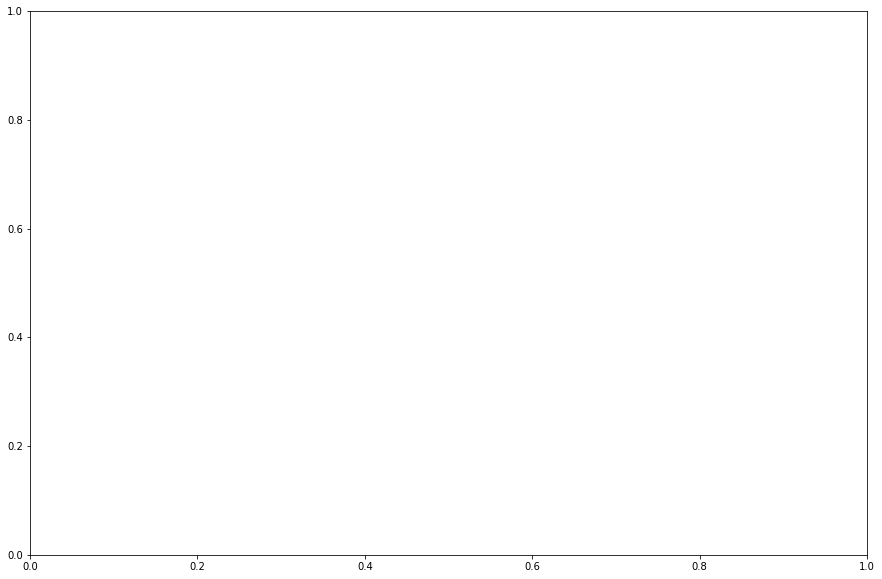

In [108]:
f,axa = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(wnf.corr()[['visitors']])

In [ ]:
displayData(airVisit)

In [ ]:
airVisit['visit_date'] = pd.to_datetime(airVisit['visit_date']).dt.date
wnf2 = pd.merge(wnf,airVisit,on=['air_store_id','visit_date'])

In [ ]:
# wnf2
displayData(wnf2)
printData(wnf2)

In [ ]:
# wnf
displayData(wnf)
printData(wnf)


In [ ]:
# air_visit_data
displayData(airVisit)

In [ ]:
wnf['air_genre_name'] = wnf['air_genre_name'].astype('category')
wnf['hpg_genre_name'] = wnf['hpg_genre_name'].astype('category')
wnf['air_area_name'] = wnf['air_area_name'].astype('category')
wnf['hpg_area_name'] = wnf['hpg_area_name'].astype('category')

In [ ]:
from importlib import reload
import pyMechkar as mechkar
reload(mechkar)

In [ ]:
x=wnf.columns.tolist()
tab1 = mechkar.pyMechkar().Table1(x=x,y="visitors",data=wnf,excel=True,excel_file="Table1_iris.xlsx")

In [ ]:
printData(hpg)